In [1]:
import qiskit as qk
from qiskit import QuantumCircuit, Aer, IBMQ
from qiskit import transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit import transpile

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import copy

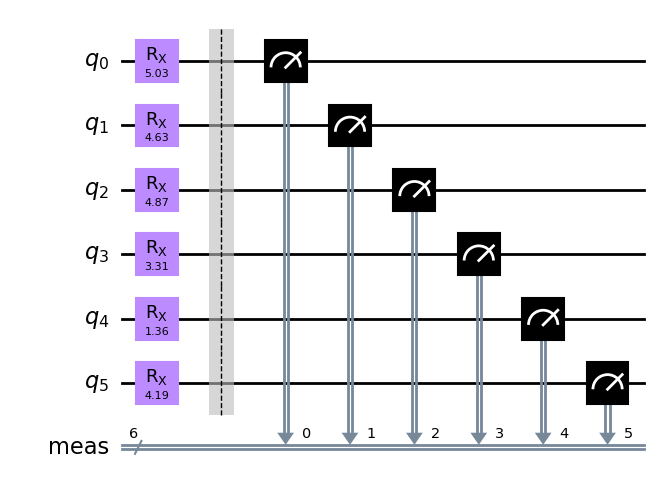

In [10]:
qc = QuantumCircuit(6)

# Randomize thetas
min_theta = 0
max_theta = 2
thetas = ((max_theta - min_theta) * np.random.rand((6)) + min_theta) * np.pi

# Use some cool thetas
# thetas = np.array([1/3, 1/2, 1/2, 1/2, 1/2, 1/3]) * np.pi
# thetas = np.array([1, 1/2, 1/2, 1/2, 1/4, 1/3]) * np.pi

# Calculate the coeficients
alphas = np.zeros((6, 2), dtype="complex")
alphas[:, 0] = np.cos(thetas/2).transpose()
alphas[:, 1] = -1j * np.sin(thetas/2).transpose()

# Create the image the thetas represent
image = np.zeros((8, 8), dtype="float")
for index in range(64):
    ones = np.array(list(map(int, list(f"{str(bin(index))[2:]:0>6}"[::-1]))))
    prod = 1
    for j in range(6):
        prod *= alphas[j, ones[j]]
    
    # Store the intensity
    image[index//8][index % 8] = abs(prod**2)
maxi = max([val for row in image for val in row])

max_intensity = 1
for i in range(8):
    for j in range(8):
        image[j][i] = (image[j][i] / maxi) * max_intensity


for index, th in enumerate(thetas):
    qc.rx(th, index)
qc.measure_all()

qc.draw('mpl')


Circuit Depth: 4


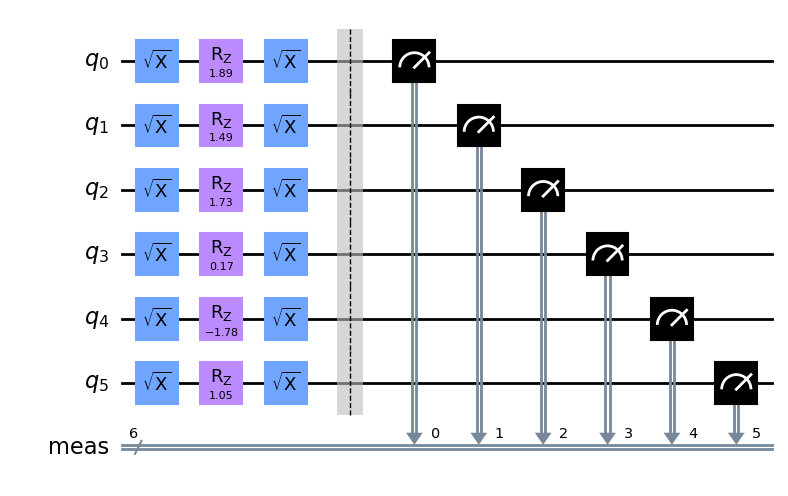

In [11]:
qc = QuantumCircuit(6)
qubits = [0, 1, 2, 3, 4, 5]

qc.sx(qubits)
for th, qu in zip(thetas, qubits):
    qc.rz(th - np.pi, qu)
qc.sx(qubits)
qc.measure_all()

print('Circuit Depth:', qc.depth())
qc.draw('mpl')

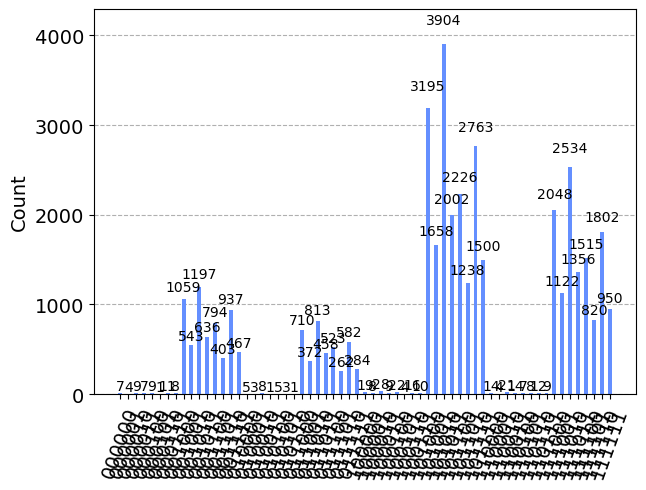

In [12]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
result = aer_sim.run(t_qc, shots=5*8192).result()
counts = result.get_counts(qc)

plot_histogram(counts)

In [13]:
# Image reconstruction
highest_count = max(counts.values())
rec_image = [[0 for _ in range(8)] for _ in range(8)]

for k in counts.keys():
    q1 = int(k[:3], 2)
    q2 = int(k[3:], 2)
    
    rec_image[q1][q2] = (counts[k]/highest_count)*max_intensity

Text(0.5, 1.0, 'Reconstructed Image')

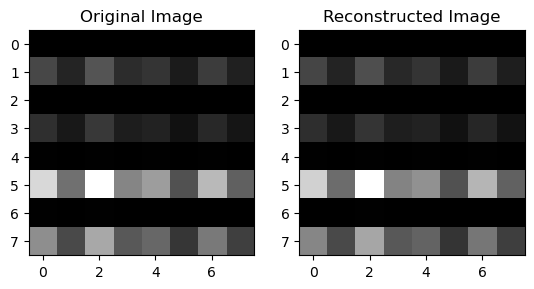

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2)

ax1.imshow(image, cmap='gray', vmin=0, vmax=1)
ax1.set_title('Original Image')

ax2.imshow(rec_image, cmap='gray', vmin=0, vmax=1)
ax2.set_title('Reconstructed Image')

In [15]:
image_diff = image - rec_image
squared_diff = 0
for i in range(len(image_diff)):
    for j in range(len(image_diff[i])):
        squared_diff += image_diff[i][j]**2

print('Squared error:', squared_diff)

Squared error: 0.006496790050710532


In [8]:
# Run
from qiskit_ibm_provider import IBMProvider
provider = IBMProvider()


hub = "ibm-q-community"
group = "digiq-icfo-hack"
project = "main"

backend_name = "ibmq_jakarta" # 7 qubits
#backend_name = "ibmq_guadalupe	" # 16 qubits

backend = provider.get_backend(backend_name, instance=f"{hub}/{group}/{project}")
shots = 1024 # Number of shots to run each circuit for

AccountNotFoundError: 'No default ibm_quantum account saved.'

In [9]:
qc_transpiled = transpile(qc, backend)

job = backend.run(qc_transpiled, shots=shots, job_tags=["team_name", "bcn_hackathon"])
counts = job.result().get_counts()

NameError: name 'backend' is not defined

Text(0.5, 1.0, 'Reconstructed Image')

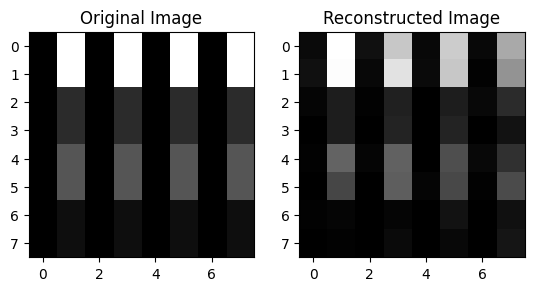

In [15]:
# Image reconstruction
highest_count = max(counts.values())
rec_image = [[0 for _ in range(8)] for _ in range(8)]

for k in counts.keys():
    q1 = int(k[:3], 2)
    q2 = int(k[3:], 2)
    
    rec_image[q1][q2] = (counts[k]/highest_count)*max_intensity

fig, (ax1, ax2) = plt.subplots(ncols=2)

ax1.imshow(image, cmap='gray', vmin=0, vmax=1)
ax1.set_title('Original Image')

ax2.imshow(rec_image, cmap='gray', vmin=0, vmax=1)
ax2.set_title('Reconstructed Image')

In [16]:
image_diff = image - rec_image
squared_diff = 0
for i in range(len(image_diff)):
    for j in range(len(image_diff[i])):
        squared_diff += image_diff[i][j]**2

print('Squared error:', squared_diff)

Squared error: 0.5258945626061277
